In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=d2c28eb9a4a4b60e235183ffa55394fc4fa3c6ee4a98776ac96522a73ebb6a42
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
import deepface
print(deepface.__version__)

0.0.91


Número de faces detectadas: 0


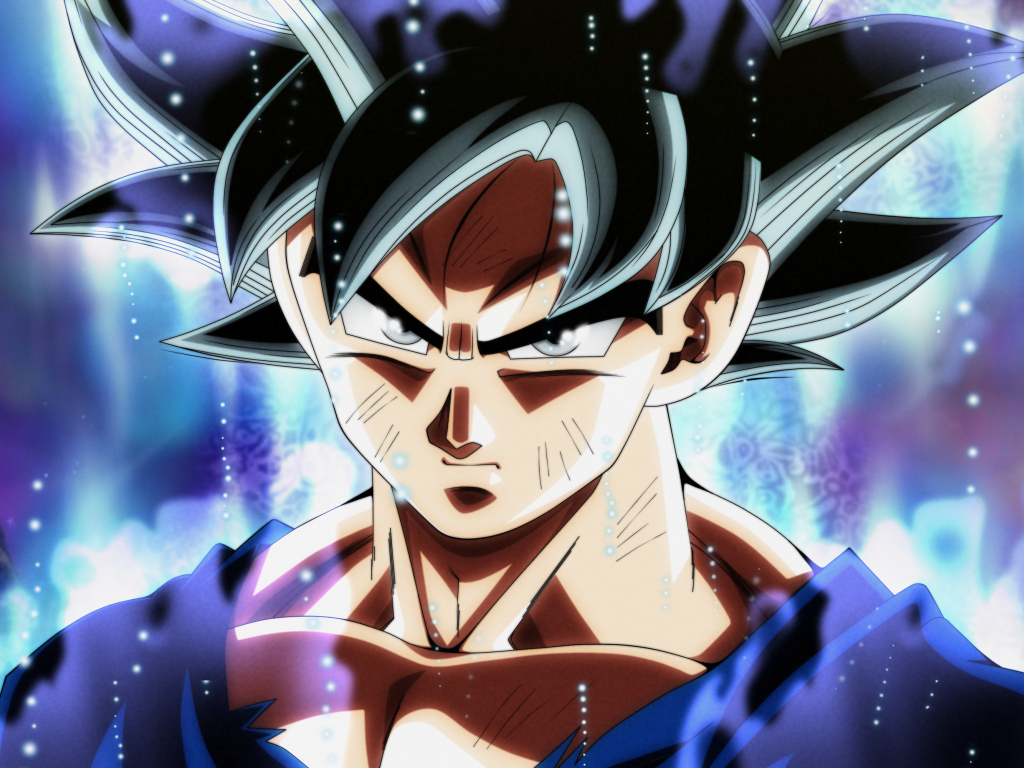

In [ ]:
import cv2
import numpy as np
from deepface import DeepFace
import requests
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def load_image_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content))
        return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    except Exception as e:
        print("Erro ao baixar a imagem:", e)
        return None

def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return faces, image

def classify_faces(image, faces):
    classifications = []

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        prediction = DeepFace.analyze(face, actions=['age', 'gender', 'race', 'emotion'])
        classifications.append(prediction)

    return classifications

image_url = "https://wallpapersmug.com/download/1024x768/01e666/Ultra-Instinct-Dragon_Ball-goku.jpg"  # Substitua "imagename.jpg" pelo nome da sua imagem

image = load_image_from_url(image_url)

if image is not None:
    faces, image_with_faces = detect_faces(image)

    num_faces = len(faces)
    print(f"Número de faces detectadas: {num_faces}")

    classifications = classify_faces(image_with_faces, faces)

    for idx, classification in enumerate(classifications):
        print(f"\nFace {idx+1}:")
        print(f"  Idade: {classification['age']}")
        print(f"  Gênero: {classification['gender']}")
        print(f"  Raça: {classification['dominant_race']}")
        print(f"  Emoção: {classification['dominant_emotion']}")

    cv2_imshow(image_with_faces)
else:
    print("Não foi possível carregar a imagem.")